# Teste de Hipóteses

# Importando bibliotecas 

In [7]:
from scipy.stats import normaltest
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import simps

# Visualizando Dataset

In [8]:
df = pd.read_csv('../dados/dados.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# D'Agostino's K-squared test

Teste que de hipótese que verifica se a distribuição é normal

## Definindo a significância do teste($\alpha$)

In [9]:
significancia = 0.05

## Testando  Variável renda

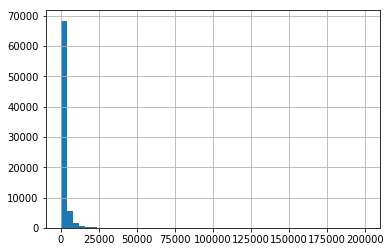

In [10]:
df.Renda.hist(bins = 50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [11]:
stat_test, p_valor = normaltest(df.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0


In [12]:
p_valor <= significancia

True

A Hipótese nula $H_0$ define se a distribuição é normal ou não. No caso, deve se rejeitar a hipótese se o valor p for menor que a significancia. Logo essa distribuição não é uma distribuição normal. 

## Testando a variável Altura

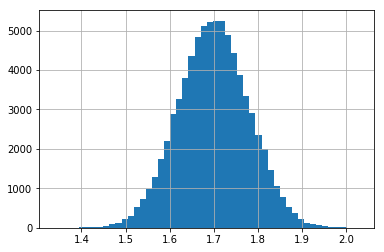

In [13]:
df.Altura.hist(bins=50)

In [14]:
stat_test, p_valor = normaltest(df.Altura)
print(stat_test)
print(p_valor)

0.19973093957002253
0.9049591541967501


In [15]:
p_valor <= significancia

False

A Hipótese nula  H0H0  define se a distribuição é normal ou não. No caso, deve se rejeitar a hipótese se o valor p for menor que a significancia. Logo essa distribuição é uma distribuição normal pois ela passou no teste da hipótese nula.

# Teste Bicaudal

In [16]:
media = 50
amostra = [59, 55, 45, 50, 46, 59, 47, 52, 53, 55, 
           51, 55, 51, 55, 54, 47, 56, 56, 58, 55, 
           47, 54, 50, 48, 56, 46, 58, 47, 53, 51, 
           53, 56, 49, 48, 59, 57, 53, 49, 59, 45, 
           52, 55, 54, 59, 58, 51, 55, 47, 58, 57]
df = pd.DataFrame(amostra, columns=['Amostra'])
n = df.shape[0]
desvio_amostra = df.std()[0]
media_amostra = df.mean()[0]
significancia = 0.05
confianca = 1-significancia

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

In [17]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

### Obtendo $z_{\alpha/2}$

In [18]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

O Valor de Z deve ser absoluto!

In [19]:
z = np.abs(media-media_amostra)/(desvio_amostra/np.sqrt(n))
z

4.7134726540688625

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [20]:
z <= z_alpha_2

False

In [21]:
p = 2*(1- norm.cdf(z))
p

2.4353042016311832e-06

In [22]:
p_valor = norm.sf(z)
p_valor

1.2176521008606557e-06

In [23]:
p_valor >= 0.05

False

Logo rejeita a Hipótese nula

# Entendendo mais a fundo o P-value

In [24]:
std= 100

In [25]:
f = (1/np.sqrt(2*3.14))*np.exp(-(1/2)*z**2)

In [26]:
zeta = range(100)

In [27]:
f= []
for z in range(100):
    n=(1/np.sqrt(2*3.14))*np.exp(-(1/2)*(z/10)**2)
    f.append(n)
f

[0.3990434422338111,
 0.39705320476264633,
 0.3911418526693425,
 0.3814845259175355,
 0.3683635244444223,
 0.35215460176803326,
 0.33330910035691713,
 0.3123331131920607,
 0.2897650113286529,
 0.2661527224950952,
 0.24203208227207357,
 0.2179074189221644,
 0.1942352957333402,
 0.17141204685727557,
 0.14976543279421664,
 0.1295504381043759,
 0.11094896144223894,
 0.09407292588196736,
 0.07897017809591875,
 0.06563245331208338,
 0.054004657278425724,
 0.04399474912558768,
 0.03548358831999167,
 0.028334220773294165,
 0.022400208990311327,
 0.01753274523428297,
 0.013586413536594387,
 0.01042357730410772,
 0.007917458744480702,
 0.005954041833835127,
 0.004432972218383701,
 0.0032676474401993312,
 0.0023846927468912345,
 0.00172300573966077,
 0.0012325316285834126,
 0.000872903985655587,
 0.0006120570932126139,
 0.00042488798425430744,
 0.0002920209562650932,
 0.00019870584547565474,
 0.00013386416177901846,
 8.928429171161266e-05,
 5.895801425139183e-05,
 3.8544968308814955e-05,
 2.49487

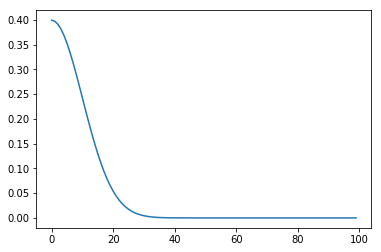

In [28]:
fig, ax = plt.subplots()
ax.plot( range(len(f)), f)

In [29]:
def integrand(z):
    return (1/np.sqrt(2*3.14))*np.exp(-(1/2)*(z/10)**2)
I = quad(integrand, 0, 1)
I

(0.3983793662522181, 4.422899449487906e-15)

In [30]:
def f1(z):
   return (1/np.sqrt(2*3.14))*np.exp(-(1/2)*(z)**2)

In [31]:
z = np.array([0,2.30])
y1 = f1(z)

In [32]:
I1 = simps(y1, z)
print(I1)

0.49148431245817104


In [33]:
Z = I1 + 0.5
Z

0.991484312458171

In [34]:
tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


# Importando Z Teste

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [35]:
from statsmodels.stats.weightstats import ztest

In [36]:
ztest(x1 = amostra, value = media)

(4.7134726540688625, 2.4353042017213113e-06)

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [37]:
from statsmodels.stats.weightstats import DescrStatsW

In [38]:
test = DescrStatsW(amostra)

In [39]:
z, p_valor = test.ztest_mean(value = media)


In [40]:
z

4.713472654068863

In [41]:
p_valor

2.4353042017213063e-06

In [45]:
t = range(1,10)

In [46]:
t


range(1, 10)

In [47]:
pd.DataFrame(t)

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
